# ГРАДИЕНТНЫЕ МЕТОДЫ
## УСКОРЕННЫЙ ГРАДИЕНТНЫЙ МЕТОД.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as skldata
import scipy.special as scspec

In [11]:

import types
def backtracking (x, f, grad_f, rho, alpha0, beta1, beta2):
    
    alpha = alpha0
    if isinstance(grad_f ,types.FunctionType):
        phi1 = f(x) -  beta1 * alpha * grad_f(x).dot(grad_f(x))
        phi2 = f(x) -  beta2 * alpha * grad_f(x).dot(grad_f(x))    
        f_k = f(x - alpha * grad_f(x)) 
    else:
        phi1 = f(x) -  beta1 * alpha * grad_f @ grad_f
        phi2 = f(x) -  beta2 * alpha * grad_f @ grad_f  
        f_k = f(x - alpha * grad_f) 

    while not ((f_k <=phi1) and 
              (f_k >=phi2)):
        alpha *= rho
        
        if isinstance(grad_f ,types.FunctionType):
            phi1 = f(x) -  beta1 * alpha * grad_f(x).dot(grad_f(x))
            phi2 = f(x) -  beta2 * alpha * grad_f(x).dot(grad_f(x))    
            f_k = f(x - alpha * grad_f(x)) 
        else: 
            phi1 = f(x) -  beta1 * alpha * grad_f @ grad_f
            phi2 = f(x) -  beta2 * alpha * grad_f @ grad_f  
            f_k = f(x - alpha * grad_f) 
        if alpha < 1e-17:

            return alpha / rho

    return alpha

#Callback и в  GD и в CG написан по убогому, поэтому этот костыль для рисования графика
def  get_x_y_from_callback(array, x0):
    x_array = [x0[0]]
    y_array = [x0[0]]
    for el in array:
        x_array.append(el[0])
        y_array.append(el[1])
        
    return np.array(x_array), np.array(y_array)





### ОДНА ИТЕРАЦИЯ ГРАДИЕНТНОГО МЕТОДА

$$
x_{k+1} = x_k - \alpha_k f'(x_k)
$$

Где  $\alpha$ может выбираться по-разному. Один из способов - правило Голдштейна-Армийо

$$
\beta_{1} \langle  f'(x_k), x_k -  x_{k+1}  \rangle \leq  f(x_k) -  f(x_{k+1})
$$
$$
\beta_{2} \langle  f'(x_k), x_k -  x_{k+1}  \rangle \geq  f(x_k) -  f(x_{k+1})
$$


In [12]:
#GradientDescent честно скопированный с предыдущего семнара
def GradientDescent(f, gradf, x0, max_iter=1000, tol=1e-8,  rho=0.7, beta1=0.3):
    x = x0.copy()
    iteration = 0
    conv_array = []

  
    while True:

        beta2 = 1. -beta1
        #TO DO
        alpha = backtracking (x, f, gradf, rho=rho, alpha0=1., beta1=beta1, beta2=beta2)
        gradient = gradf(x)
        x = x - alpha * gradient
        #END TO DO
        iteration += 1
        if np.linalg.norm(gradf(x)) < tol:
            break
        if iteration >= max_iter:
            break
        conv_array.append(x)
    res = {"x": x, "num_iter": iteration, "tol": np.linalg.norm(gradf(x)),  "conv_array": conv_array}
    return res


## УСКОРЕННЫЙ МЕТОД НЕСТЕРОВА

![](NESTEROVG.png)

([Картинка отсюда](https://cs231n.github.io/neural-networks-3/))

## ФОРМУЛЫ УСКОРЕННОГО МЕТОДА НЕСТЕРОВА

У нас появляется новый параметр **momentum** $\gamma$, который позволяет запоминать информацию о предыдущем направлении, и переменная **change**, $ c $ которая содержит информацию о предыдущих шагах.

$$
\texttt{proj} = x_k + \gamma c \\
\texttt{grad}_{\texttt{proj}} = f'(\texttt{proj}) \\
c = \gamma c - \alpha_k grad_{\texttt{proj}} \\
x_{k+1} = x_k + c
$$

In [73]:
def NesterovAcceleratedGD(f, gradf, x0, momentum =0.9, max_iter=1000, tol=1e-8,  rho=0.5, beta1=0.2):
    x = x0.copy()
    iteration = 0
    conv_array = []

    change = np.zeros(x.shape)
   
    while True:

        beta2 = 1. -beta1
        #TO DO
        proj = x + momentum * change
        
        gradient = gradf(proj)
        alpha = backtracking (x, f, gradf, rho=rho, alpha0=1., beta1=beta1, beta2=beta2)
        change = momentum * change - alpha * gradient
        x = x  + change
        
        #END TO DO
        iteration += 1
        if np.linalg.norm(gradf(x)) < tol:
            break
        if iteration >= max_iter:
            break
        conv_array.append(x)
    res = {"x": x, "num_iter": iteration, "tol": np.linalg.norm(gradf(x)),  "conv_array": conv_array}
    return res

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
np.random.seed(23)
n=100
# строим и нормализуем матрицу
A = np.array([[4,3], [3,4]])
U = np.random.rand(2, 2)
Q, _ = np.linalg.qr(U)
A = Q.dot(A).dot(Q.T)
A = (A + A.T) * 0.5

n_points = 100

u = np.linspace(-4, 4, n_points)
x, y = np.meshgrid(u, u)
b = np.random.rand(2)
X = np.vstack([x.flatten(), y.flatten()])

# строим изолинии
f_x = X.T @ A @ X - b @ X

f_x = np.diag(f_x).reshape(n_points, n_points)


# b I used  in my own experiments array([0.22104536, 0.68622209]) 

# начальное приближение
x0 = np.array([-4. , -4.])


# вспомогательные функции для кастомного Gradient DEscent
f = lambda x: 0.5 * x.dot(A.dot(x)) - b.dot(x)
grad_f = lambda x: A.dot(x) - b




No handles with labels found to put in legend.


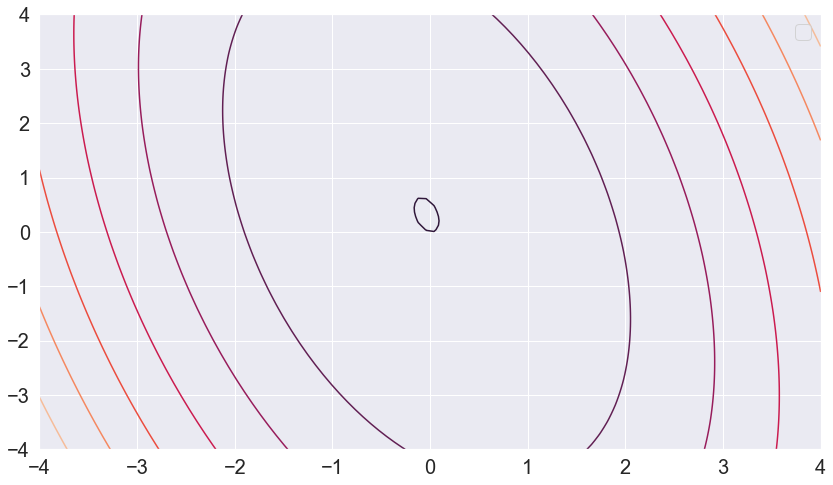

In [61]:
plt.figure(figsize = (14, 8))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)
plt.contour(x, y, f_x)

In [87]:
res_nest = NesterovAcceleratedGD(f, grad_f, x0, )
x_na, y_na = get_x_y_from_callback(res_nest["conv_array"], x0)

In [88]:
res = GradientDescent(f, grad_f, x0, rho=0.5, beta1=0.2)
x_gd, y_gd = get_x_y_from_callback(res['conv_array'], x0) 

In [89]:
len(res["conv_array"]), len(res_nest["conv_array"])

(69, 84)

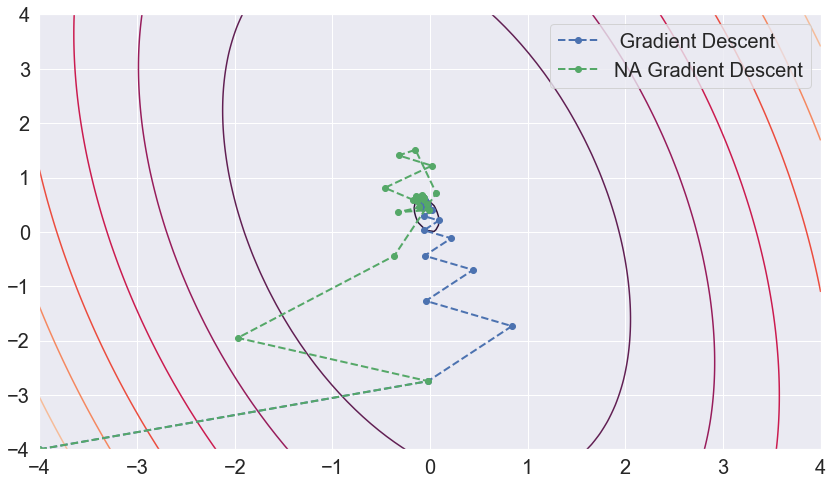

In [90]:
import seaborn as sns
sns.set()

plt.figure(figsize = (14, 8))
plt.plot(x_gd, y_gd, '--bo',linewidth=2, label=' Gradient Descent')

plt.plot(x_na, y_na ,'--go', linewidth=2, label='NA Gradient Descent')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)
plt.contour(x, y, f_x)

In [91]:
res_nest = NesterovAcceleratedGD(f, grad_f, x0, momentum =0.15)
x_na, y_na = get_x_y_from_callback(res_nest["conv_array"], x0)

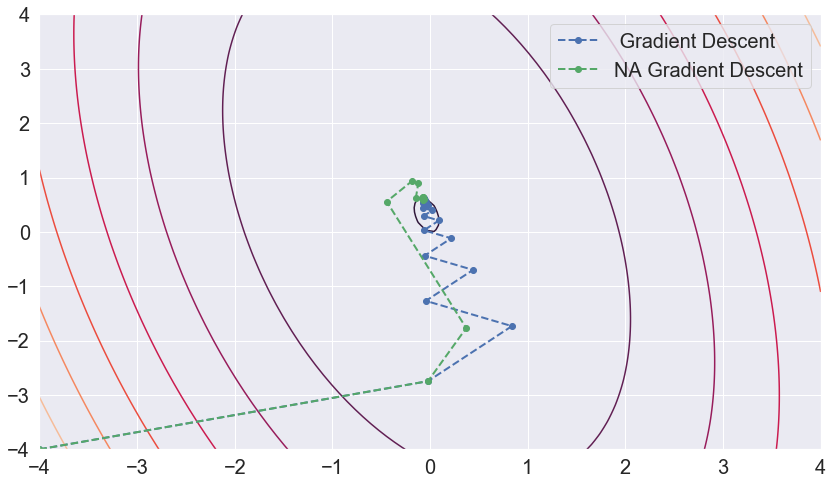

In [92]:
import seaborn as sns
sns.set()

plt.figure(figsize = (14, 8))
plt.plot(x_gd, y_gd, '--bo',linewidth=2, label=' Gradient Descent')


plt.plot(x_na, y_na ,'--go', linewidth=2, label='NA Gradient Descent')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)
plt.contour(x, y, f_x)

In [93]:
len(res["conv_array"]), len(res_nest["conv_array"])

(69, 30)

## МЕТОД СОПРЯЖЕННЫХ ГРАДИЕНТОВ. 


По жизни мы хотим решать системы вида
$$
Ax = b
$$

Как это можно делать?




- Прямые методы основаны на матричных разложениях (**LU разложение** (тот же самый процесс Гаусса), **разложение Холецкого** итд)     

     - Точное решение
     - Предсказуемое поведение
     - Процесс Гаусса зависит от размерности как  $O(n^{3})$
- Итеративные методы
     - работают =)

## Пара слов про Базис Крылова

Крыловское подпространство генерируется из одного единственного вектора $r_0 = f - Ax_0$:

$$y_0\equiv k_0 = r_0, \quad y_1\equiv k_1 = A r_0, \quad y_2\equiv k_2 = A^2 r_0, \ldots, \quad y_{M-1}\equiv k_{M-1} = A^{M-1} r_0.$$

Такой алгоритм дает нам **Крыловское подпространство** порядка  $M$

$$\mathcal{K}_M(A, r_0) = \mathrm{Span}(r_0, Ar_0, \ldots, A^{M-1} r_0).$$


 Решение  $x_*$ лежит в крыловском подрастранстве $x_* \in \mathcal{K}_n(A, f)$
 
Базис Крылова очень плохой. Из процесса его ортогонализации  выводится метод сопряженных градиентов 
 

In [6]:
from IPython.display import YouTubeVideo
video = YouTubeVideo('HT3o_4UVcyU')

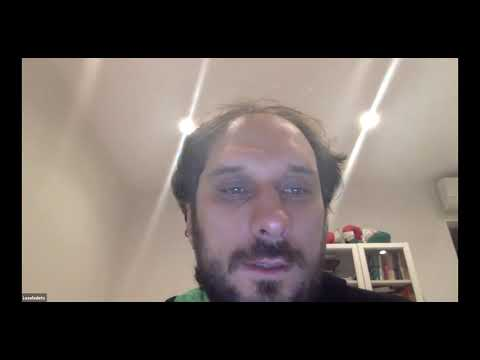

In [9]:
# советую посмотреть для красивой идеи и математики
display (video)

## Здесь и далее полагаем две важные вещи 
- Матрица $A \succ 0$ 
- Матрица $A \in \mathcal{S}$


Без этого метод сопряженных градиентов не сойдется

## Введем два определения

-  А- ортогональность
$$
(x, Ay) = 0
$$

Если вектора $x$ и $y$ ортогональны в смысле $А$ - скалярного произведения, то такие вектора нахываются **сопряженными**

- Невязка 
$$
r_0 = A x_0 - b
$$


## Какой функционал минимизирует метод сопряженных градиентов?

Нам нужно найти решение линейной системы
$$
Ax^{*} = b
$$
$$
Ax^{*} - b = 0
$$

$Ax^{*} - b = 0$ уже градиент  квадратичной функции !!!! Значит перед методом сопряженных градиентов ставится такая задача!

$$ 
min \frac{1}{2} \langle x, Ax \rangle - \langle b, x \rangle \\
s.t. A \in \mathcal{S}^{n}_{++}
$$

## Итерация Метода сопряженных градиентов

начальное приближение $x_0$
$$
p_{1} =r_{0}= A x_0 - b
$$

Итерация метода сопряженных градиентов

$$
x_j = x_{j-1} + \alpha_{j-1} p_{j-1} \\
r_j = r_{j-1} - \alpha_{j-1}  A p_{j-1} \\
p_j = r_j + \beta_j p_{j-1} \\
$$

Где

$$
\alpha = \frac{\langle r_j, p_j \rangle}{\langle p_j,  A p_j \rangle }    \quad \quad \quad \quad \quad \beta = \frac{\langle r_j, A p_j \rangle}{\langle p_j,  A p_j \rangle } 
$$


##### стоит ли оставлять все так?


##  НЕТ

Можно улучшить вспомнив, что $p_j = r_j + \beta_j p_{j-1}$


$$
\alpha = \frac{\langle r_j, p_j \rangle}{\langle p_j,  A p_j \rangle } =  \frac{\langle r_j, r_j + \beta_j p_{j-1} \rangle}{\langle p_j,  A p_j \rangle } = \alpha = \frac{\langle r_j, r_j \rangle}{\langle p_j,  A p_j \rangle } 
$$

$$
\beta_k = \dfrac{r^{\top}_k r_k}{r^{\top}_{k-1} r_{k-1}}
$$

# НАПИШЕМ МЕТОД СОПРЯЖЕННЫХ ГРАДИЕНТОВ 

In [69]:
def ConjugateGradient(x0, A, b, tol=1e-8, callback=None):
    x = x0
    r = b - A.dot(x0) 
    p = r
    while np.linalg.norm(r) > tol:
        
        #TO DO
        alpha = r.dot(r) / p.dot(A.dot(p))
        x = x + alpha * p
        r_next = r - alpha * A.dot(p)
        beta = r_next.dot(r_next) / r.dot(r)
        p = r_next + beta * p
        r = r_next
        #END TO DO
        if callback is not None:
            callback(x)
    return x

In [70]:
#Callback для Conjugate Gradient сохраняющий все в массив
xk_array = []
callback = lambda x: xk_array.append(x)


ConjugateGradient(x0, A, b, callback=callback)
x_cg, y_cg = get_x_y_from_callback(xk_array, x0)

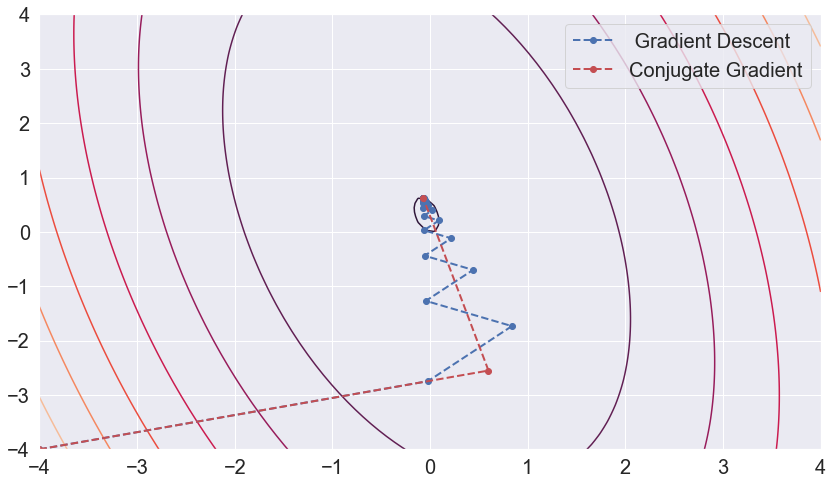

In [71]:
import seaborn as sns
sns.set()

plt.figure(figsize = (14, 8))
plt.plot(x_gd, y_gd, '--bo',linewidth=2, label=' Gradient Descent')
plt.plot(x_cg, y_cg, '--ro', linewidth=2, label='Conjugate Gradient')

# plt.plot(x_na, y_na ,'--go', linewidth=2, label='NA Gradient Descent')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)
plt.contour(x, y, f_x)

## СЛУЧАЙНАЯ ЛИ ЭТО СИТУАЦИЯ?

НЕТ!!

У метода сопряженных градиентов есть такие заечательные теоремы сходимости

### Теоремы сходимости

**Теорема 1.** Если матрица $A$ имеет только $r$ различных собственных значений, то метод сопряжённых градиентов cойдётся за $r$ итераций.

**Теорема 2.** Имеет место следующая оценка сходимости
$$
\| x_{k+1} - x^* \|_A \leq \left( \dfrac{\sqrt{\kappa(A)} - 1}{\sqrt{\kappa(A)} + 1} \right)^k \|x_0 - x^*\|_A,
$$
где $\|x\|_A = x^{\top}Ax$ и $\kappa(A) = \frac{\lambda_n(A)}{\lambda_1(A)}$ - число обусловленности матрицы $A$



###### В БОЛЬШИНСТВЕ СЛУЧАЕВ СХОДИМОСТЬ СУПЕРЛИНЕЙНА

In [35]:
import numpy as np
n = 100

# Clustered eigenvalues ЧЕТЫРЕ ШТУКИ

A = np.diagflat([np.ones(n//4), 10 * np.ones(n//4), 100*np.ones(n//4), 1000* np.ones(n//4)])
U = np.random.rand(n, n)
Q, _ = np.linalg.qr(U)
A = Q.dot(A).dot(Q.T)
A = (A + A.T) * 0.5
print("A is normal matrix: ||AA* - A*A|| =", np.linalg.norm(A.dot(A.T) - A.T.dot(A)))
b = np.random.rand(n)


f = lambda x: 0.5 * x.dot(A.dot(x)) - b.dot(x)
grad_f = lambda x: A.dot(x) - b
x0 = np.zeros(n)

A is normal matrix: ||AA* - A*A|| = 0.0


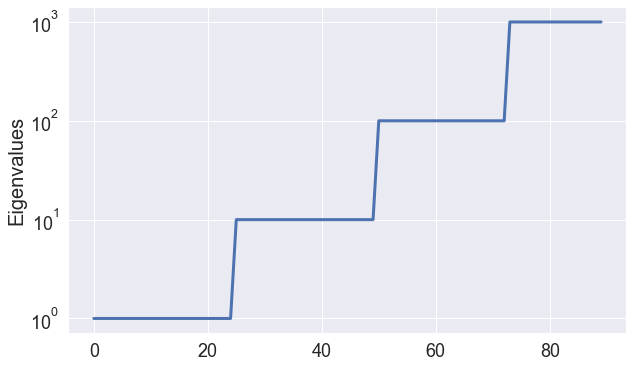

In [36]:
sns.set()
eigs = np.linalg.eigvalsh(A)
plt.figure(figsize = (10, 6))
plt.semilogy(np.unique(eigs), linewidth = 3)
plt.ylabel("Eigenvalues", fontsize=20)
plt.xticks(fontsize=18)
_= plt.yticks(fontsize=18)

# plt.tight_layout()

In [37]:
xk_array = []
callback = lambda x: xk_array.append(x)
res = GradientDescent(f, grad_f, x0)
x_cg = ConjugateGradient(x0, A, b, callback=callback)
x_gd = res['x']
print('GRADIENT DESCENT')
print(r"||Ax - b||", np.linalg.norm(A @ x_cg -b))
print("number of iterations ", len(xk_array))

print()
print()
print('CONJUGGATE GRADIENT ')

print(r"||Ax - b||", np.linalg.norm(A @ x_gd -b))
print("number of iterations ", len(res['conv_array']))

# import pandas as pd

# table_dict = {
#     'methods' :['GRADIENT DESCENT', 'CONJUGGATE GRADIENT '],
#     "||Ax - b||": [np.linalg.norm(A @ x_cg -b), np.linalg.norm(A @ x_gd -b)],
#     "# iterations " :[len(xk_array), len(res['conv_array'])]
# }

# table =pd.DataFrame(table_dict)
# table


GRADIENT DESCENT
||Ax - b|| 7.099224566505146e-10
number of iterations  4


CONJUGGATE GRADIENT 
||Ax - b|| 0.7897004432691006
number of iterations  999


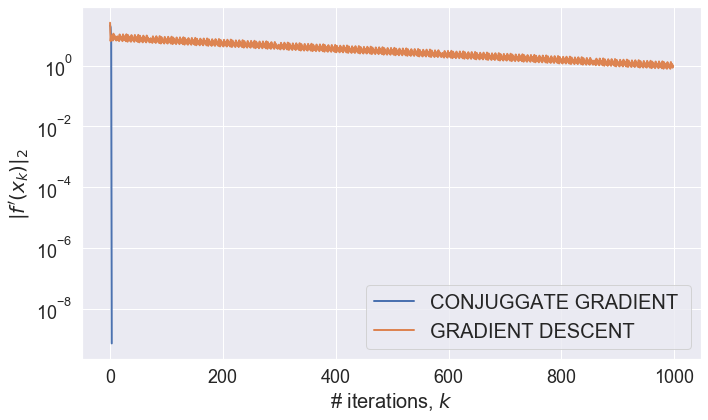

In [38]:
sns.set()

plt.figure(figsize=(10,6))
plt.semilogy([np.linalg.norm(grad_f(x)) for x in xk_array], label= 'CONJUGGATE GRADIENT ', linewidth=2)

plt.semilogy([np.linalg.norm(grad_f(x)) for x in res['conv_array']], label='GRADIENT DESCENT', linewidth=2)
plt.legend(loc="best", fontsize=20)
plt.xlabel(r"# iterations, $k$", fontsize=20)
plt.ylabel(r"$\|f'(x_k)\|_2$", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)
plt.tight_layout()

# СЛУЧАЙ НЕКВАДРАТИЧНОГО ФУНКЦИОНАЛА

![](FR_CHICAGO_LEC.png)

([Картинка отсюда](https://www.mcs.anl.gov/~anitescu/CLASSES/2011/LECTURES/STAT310-2011-lec6.pdf))

In [41]:

def FletcherReevesMethod(f, gradf, x0, num_iter=100, tol=1e-8, callback=None, restart=False):
    x = x0
    grad = gradf(x)
    p = -grad
    k = 0
    while np.linalg.norm(gradf(x)) > tol:

        #TO DO
        alpha = backtracking (x, f, -p ,rho=0.5, alpha0=1., beta1=0.01, beta2=0.9,)
        x = x + alpha * p
        grad_next = gradf(x)
        beta = grad_next.dot(grad_next) / grad.dot(grad)
        p = -grad_next + beta * p
        grad = grad_next.copy()
        #END TO DO
        
        
        k += 1
        if restart and k % restart == 0:
            grad = gradf(x)
            p = -grad
            
        if callback is not None:
            callback(x)
        if alpha < 1e-18:
            break
        if k >= num_iter:
            break
    return x

# КАКОЙ-ТО НЕКВАДРАТИЧНЫЙ ФУНКЦИОНАЛ

$$
\min_{w} \frac{1}{m} \sum^{m}_{1} \ln (1 + \exp(-w^{\top} x_{i}) y_{i}) + \frac{\|w\|^{2}_{2}}{2}
$$

Что за функционал?

![](zelensky.png)

In [42]:
import numpy as np
import sklearn.datasets as skldata
import scipy.special as scspec

n = 300
m = 1000

X, y = skldata.make_classification(n_classes=2, n_features=n, n_samples=m, n_informative=n//3)

def f(w):
    return np.linalg.norm(w)**2 / 2 + np.mean(np.logaddexp(np.zeros(X.shape[0]), -y * X.dot(w)))

def grad_f(w):
    denom = scspec.expit(-y * X.dot(w))
    return w -  X.T.dot(y * denom) / X.shape[0]

x0 = np.zeros(n)
print("Initial function value = {}".format(f(x0)))
print("Initial gradient norm = {}".format(np.linalg.norm(grad_f(x0))))

Initial function value = 0.6931471805599454
Initial gradient norm = 2.3190630383876103


In [45]:
xk_fr_array_no_restarts = []
callback_fr = lambda x: xk_fr_array_no_restarts.append(x)

x_fr_nr =FletcherReevesMethod(f, grad_f, x0, num_iter=1000, tol=1e-8, callback=callback_fr, restart=False)


In [46]:
n_restart = 10

xk_fr_array = []
callback_fr = lambda x: xk_fr_array.append(x)

x_fr =FletcherReevesMethod(f, grad_f, x0, num_iter=600, tol=1e-8, callback=callback_fr, restart=n_restart)

In [47]:
res = GradientDescent(f, grad_f, x0)

In [57]:
res_nest = NesterovAcceleratedGD(f, grad_f, x0, rho=0.7, beta1=0.3)


In [58]:
print('GRADIENT DESCENT')
print("function value", f(res['x']))
print("gradient norm",np.linalg.norm(grad_f(res['x'])))
print("number of iterations ", len(res['conv_array']))

print()
print()
print('NESTEROV ACCELERATED DESCENT')
print("function value", f(res_nest['x']))
print("gradient norm",np.linalg.norm(grad_f(res_nest['x'])))
print("number of iterations ", len(res_nest['conv_array']))

print()
print()
print('CONJUGGATE GRADIENT FLETCHER REEVES METHOD  ')
print("function value", f(x_fr_nr))
print("gradient norm",np.linalg.norm(grad_f(x_fr_nr)))
print("number of iterations ", len(xk_fr_array_no_restarts))

print()
print()
print('CONJUGGATE GRADIENT FLETCHER REEVES METHOD WITH RESTARTS  ')
print("function value", f(x_fr))
print("gradient norm",np.linalg.norm(grad_f(x_fr)))
print("number of iterations ", len(xk_fr_array))


GRADIENT DESCENT
function value 0.491741389090133
gradient norm 6.995081361387773e-09
number of iterations  505


NESTEROV ACCELERATED DESCENT
function value 0.491741389090133
gradient norm 1.987634361517419e-09
number of iterations  391


CONJUGGATE GRADIENT FLETCHER REEVES METHOD  
function value 0.49174138909013293
gradient norm 9.310610899705485e-09
number of iterations  271


CONJUGGATE GRADIENT FLETCHER REEVES METHOD WITH RESTARTS  
function value 0.491741389090133
gradient norm 9.636778875371648e-09
number of iterations  92


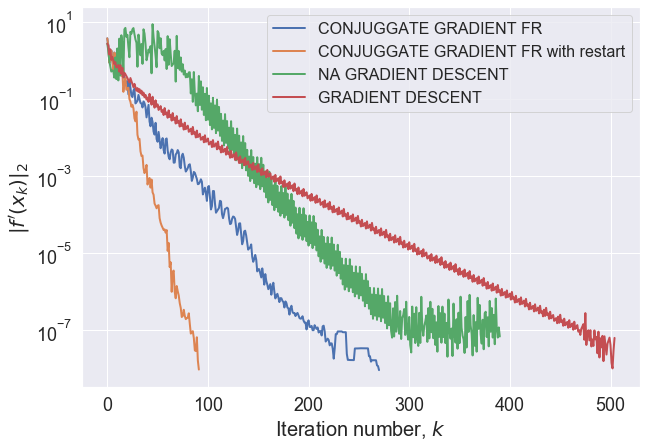

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(10, 7))
plt.semilogy([np.linalg.norm(grad_f(x)) for x in xk_fr_array_no_restarts], label="CONJUGGATE GRADIENT FR ", linewidth=2)
plt.semilogy([np.linalg.norm(grad_f(x)) for x in xk_fr_array], label="CONJUGGATE GRADIENT FR with restart", linewidth=2)

plt.semilogy([np.linalg.norm(grad_f(x)) for x in res_nest['conv_array']], label=r"NA GRADIENT DESCENT", linewidth=2)
plt.semilogy([np.linalg.norm(grad_f(x)) for x in res['conv_array']], label=r"GRADIENT DESCENT", linewidth=2)
plt.legend(loc="best", fontsize=16)
plt.xlabel(r"Iteration number, $k$", fontsize=20)
plt.ylabel(r"$\|f'(x_k)\|_2$", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)